## Model Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop('math score',axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [5]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [6]:
for feature in df.columns:
    if df[feature].dtypes == 'object':
        print(f'categories in {feature} course variable:  {df[feature].unique()}')

categories in gender course variable:  ['female' 'male']
categories in race/ethnicity course variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education course variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch course variable:  ['standard' 'free/reduced']
categories in test preparation course course variable:  ['none' 'completed']


In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features =X.select_dtypes(include="object").columns

In [8]:
print(cat_features)
print(num_features)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')
Index(['reading score', 'writing score'], dtype='object')


In [9]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
   [
       ("OneHotEncoder",encoder,cat_features),
       ("StandardScaler",scaler,num_features)
   ]
)

In [10]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
X.shape

(1000, 19)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [13]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [14]:
models = {
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNearestNeighbour":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost":CatBoostRegressor(verbose=False),
    "AdaBoost":AdaBoostRegressor(),
}

In [15]:
models_key = []
r2 = [] 

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluate Train and Test dataset
    model_trained_mae,model_trained_mse,model_trained_rmse,model_trained_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    models_key.append(list(models.keys())[i])
    r2.append(model_test_r2)
    
    print('\n')
    print('********  model_performace for training set ********')
    print(f'Root Mean Squared Error {model_trained_rmse}')
    print(f'Mean Absolute Error {model_trained_mae}')
    print(f'R squared Error {model_trained_r2}')
    print('\n')
    print('********  model_performace for test set ********')
    print(f'Root Mean Squared Error {model_test_rmse}')
    print(f'Mean Absolute Error {model_test_mae}')
    print(f'R squared Error {model_test_r2}')
            
    
    #model performance for test set



********  model_performace for training set ********
Root Mean Squared Error 5.327632973066287
Mean Absolute Error 4.2691015625
R squared Error 0.8741007335802723


********  model_performace for test set ********
Root Mean Squared Error 5.418484170238481
Mean Absolute Error 4.2234375
R squared Error 0.879345098417985


********  model_performace for training set ********
Root Mean Squared Error 5.323324922741654
Mean Absolute Error 4.26498782372598
R squared Error 0.8743042615212909


********  model_performace for test set ********
Root Mean Squared Error 5.390387016935634
Mean Absolute Error 4.211100688014258
R squared Error 0.880593148502874


********  model_performace for training set ********
Root Mean Squared Error 6.593815587795566
Mean Absolute Error 5.206302661246526
R squared Error 0.8071462015863456


********  model_performace for test set ********
Root Mean Squared Error 6.519694535667419
Mean Absolute Error 5.157881810347763
R squared Error 0.8253197323627853


******

In [16]:
print(models_key)
print(r2)

['Linear Regression', 'Ridge', 'Lasso', 'KNearestNeighbour', 'DecisionTree', 'RandomForest', 'XGBRegressor', 'CatBoost', 'AdaBoost']
[0.879345098417985, 0.880593148502874, 0.8253197323627853, 0.7838129945787431, 0.7353685238334764, 0.85592482414568, 0.8215894515233413, 0.8516318920747058, 0.854834750636173]


In [17]:
pd.DataFrame(list(zip(models_key,r2)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.879345
5,RandomForest,0.855925
8,AdaBoost,0.854835
7,CatBoost,0.851632
2,Lasso,0.825320
6,XGBRegressor,0.821589
3,KNearestNeighbour,0.783813
4,DecisionTree,0.735369


In [20]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.879345098417985

Text(0, 0.5, 'predicted')

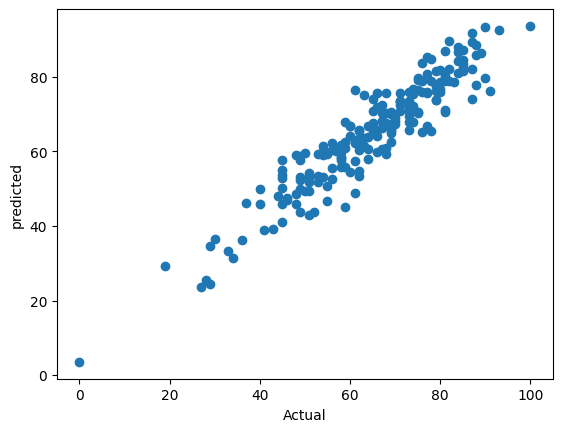

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<AxesSubplot: xlabel='math score'>

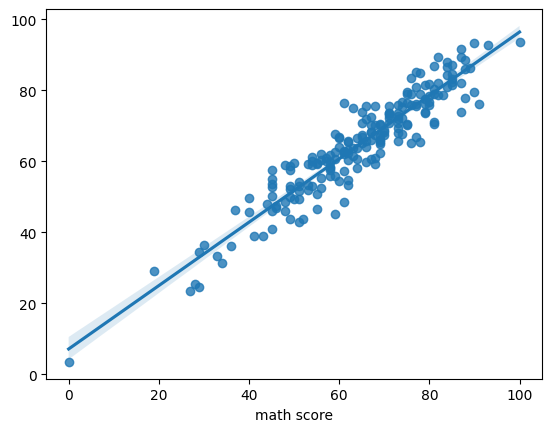

In [24]:
sns.regplot(x=y_test,y=y_pred)

In [27]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})

,Actual,Predicted,Difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
